In [153]:
## Green Cars- Data Science Course Final Project

## Load Packages

In [286]:
library("dplyr")
library("tidyr")
library("readxl")
library('ggplot2')
library("mvnormtest")
library("car")
library("IDPmisc")

## Load Data Set

In [287]:
Green_cars= read.csv("C:/Users/laran/Documents/DataScience Course/Electric_Vehicle_Population_Data.csv")

In [288]:
head(Green_cars)

,VIN..1.10.,County,City,State,Postal.Code,Model.Year,Make,Model,Electric.Vehicle.Type,Clean.Alternative.Fuel.Vehicle..CAFV..Eligibility,Electric.Range,Base.MSRP,Legislative.District,DOL.Vehicle.ID,Vehicle.Location,Electric.Utility,X2020.Census.Tract,X,X.1
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<lgl>,<int>
1,WP0AB2Y13M,Thurston,Olympia,WA,98513,2021,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203,0,2,156659646,POINT (-122.751179 47.002092),PUGET SOUND ENERGY INC,53067012331,NA,NA
2,1N4BZ1CP0K,Grant,Quincy,WA,98848,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,12,157077469,POINT (-119.830891 47.164101),PUD NO 2 OF GRANT COUNTY,53025011200,NA,NA
3,1G1FX6S06J,Skagit,Mount Vernon,WA,98274,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10,250701013,POINT (-122.250701 48.368138),PUGET SOUND ENERGY INC,53057952700,NA,NA
4,JTDKAMFP3M,Yakima,Yakima,WA,98902,2021,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14,156585922,POINT (-120.532719 46.59458),,53077001000,NA,NA
5,1N4AZ1CP4L,Snohomish,Everett,WA,98208,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,149,0,44,128498779,POINT (-122.19615 47.894423),PUGET SOUND ENERGY INC,53061052120,NA,100269
6,5YJSA1S2XF,Grant,Moses Lake,WA,98837,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,13,132461094,POINT (-119.280576 47.149471),PUD NO 2 OF GRANT COUNTY,53025011002,NA,NA


In [289]:
Green_cars1=filter(Green_cars,Electric.Range!=0)

## Subsetting Data

## Creating Subset to run Single Linear Regression

In [290]:
Subset1=c("Model.Year","DOL.Vehicle.ID")
Green_cars2=Green_cars[Subset1]

In [291]:
head(Green_cars2)

,Model.Year,DOL.Vehicle.ID
,<int>,<int>
1,2021,156659646
2,2019,157077469
3,2018,250701013
4,2021,156585922
5,2020,128498779
6,2015,132461094


In [292]:
Green_cars3=Green_cars2 %>% group_by(Model.Year) %>% summarize(Car_count = n())

In [293]:
View(Green_cars3)

Model.Year,Car_count
<int>,<int>
1993,1
1998,1
1999,3
2000,10
2002,2
2008,24
2010,25
2011,856
2012,1721


`geom_smooth()` using formula 'y ~ x'



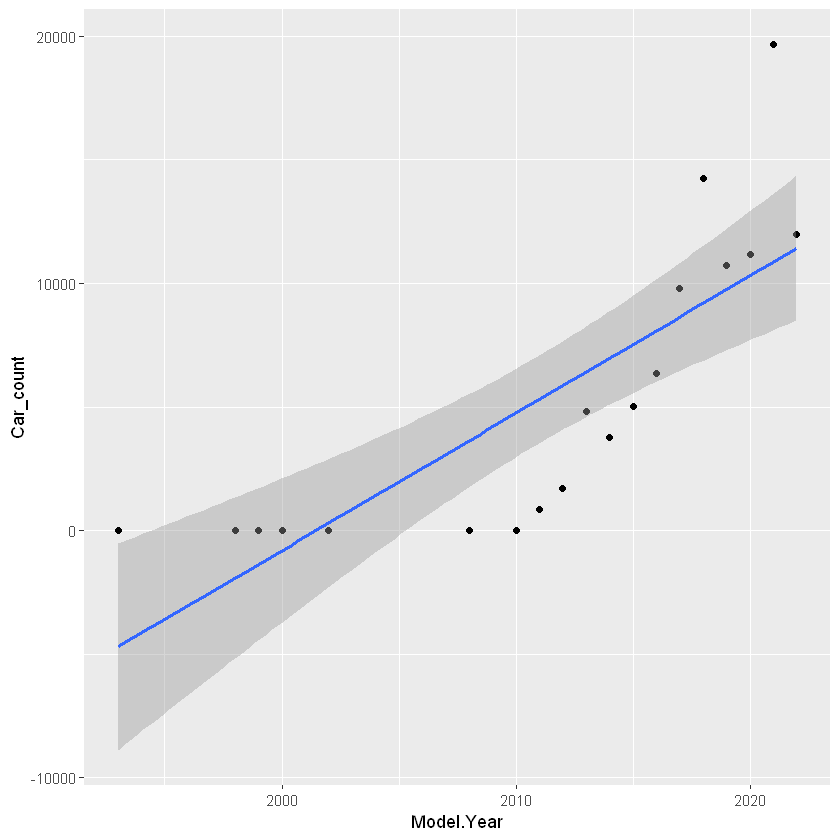

In [294]:
 ggplot(Green_cars3, aes(x = Model.Year, y = Car_count))+ geom_point()+ geom_smooth(method=lm)


## Correlation Test

In [295]:
cor.test(Green_cars3$Model.Year,Green_cars3$Car_count, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  Green_cars3$Model.Year and Green_cars3$Car_count
t = 5.57, df = 17, p-value = 3.386e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5505257 0.9215356
sample estimates:
      cor 
0.8037533 


The pvalue is les than 0.5 with means the correlation between these variables is signisicant and the correlation coefficient suggests that the correlation is strong

## Linear Regression

In [296]:
linear_regression=lm(formula = Car_count ~ Model.Year, data = Green_cars3)
linear_regression


Call:
lm(formula = Car_count ~ Model.Year, data = Green_cars3)

Coefficients:
(Intercept)   Model.Year  
   -1112893          556  


In [297]:
summary(linear_regression)


Call:
lm(formula = Car_count ~ Model.Year, data = Green_cars3)

Residuals:
   Min     1Q Median     3Q    Max 
 -4726  -2851    557   1256   8810 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.113e+06  2.007e+05  -5.544 3.57e-05 ***
Model.Year   5.560e+02  9.983e+01   5.570 3.39e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3675 on 17 degrees of freedom
Multiple R-squared:  0.646,	Adjusted R-squared:  0.6252 
F-statistic: 31.03 on 1 and 17 DF,  p-value: 3.386e-05


According to the regression the model year is a good predictor of the amount of cars that are being bought any given year
accounting for 62.5% of the variance following the formula y=556x -1112893

In [298]:
y =556*2024-1112893
y

[1] 12451

According to this model the expected amount of green cars expected for 2024 is 12,451

Since there is a significant numeric differenc between the amount of electric cars before and after the 2011 year mark,
we are going to do the same analysis but just considering cars produced after 2011

In [299]:
Green_cars3_2011=Green_cars3=filter(Green_cars3,Model.Year >=2011)

In [300]:
Green_cars3_2011

Model.Year,Car_count
<int>,<int>
2011,856
2012,1721
2013,4804
2014,3771
2015,5032
2016,6376
2017,9787
2018,14270
2019,10751


`geom_smooth()` using formula 'y ~ x'



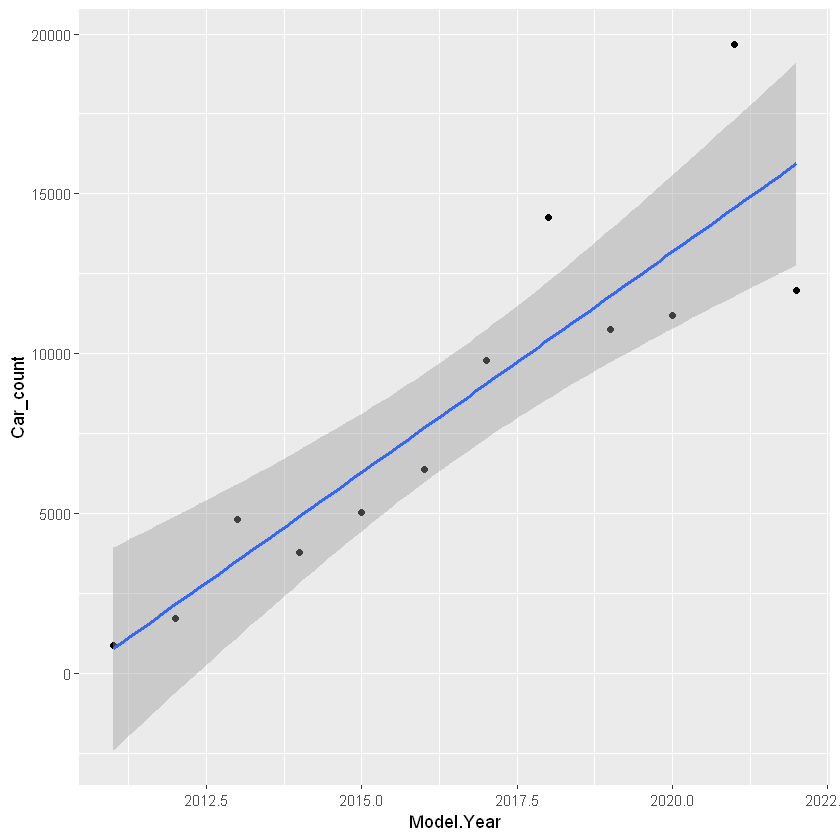

In [301]:
ggplot(Green_cars3_2011, aes(x = Model.Year, y = Car_count))+ geom_point()+ geom_smooth(method=lm)

## Correlation Test

In [302]:
cor.test(Green_cars3_2011$Model.Year,Green_cars3_2011$Car_count, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  Green_cars3_2011$Model.Year and Green_cars3_2011$Car_count
t = 6.2964, df = 10, p-value = 8.95e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6563226 0.9700397
sample estimates:
      cor 
0.8936267 


According to the correlation test the p value still points to a significant correaltion and the correlatio is stronger 
at 0.89 insread of 0.80


## Linear Regression

In [303]:
linear_regression2=lm(formula = Car_count ~ Model.Year, data = Green_cars3_2011)
linear_regression2


Call:
lm(formula = Car_count ~ Model.Year, data = Green_cars3_2011)

Coefficients:
(Intercept)   Model.Year  
   -2773933         1380  


In [304]:
summary(linear_regression2)


Call:
lm(formula = Car_count ~ Model.Year, data = Green_cars3_2011)

Residuals:
    Min      1Q  Median      3Q     Max 
-3958.9 -1257.6  -734.5   880.9  5117.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2773933.3   441885.1  -6.277 9.17e-05 ***
Model.Year      1379.8      219.1   6.296 8.95e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2620 on 10 degrees of freedom
Multiple R-squared:  0.7986,	Adjusted R-squared:  0.7784 
F-statistic: 39.64 on 1 and 10 DF,  p-value: 8.95e-05


This model has a higher F statistic than the previuous one. The Adjusted R squared suggests a higher impact of the 
model year on the amount of cars accuonting for 77.8% of the variance fallowing the formual y=1379.8x-2773933.3 

In [305]:
y2=1379.8*2024-2773933.3
y2

[1] 18781.9

According to this model the expected amount of electric cars for 2024 is 18,782

## Creating subset For Manova Analysis

We want to know if the car make makes a difference in the decision making of acquiring a car and in the electric range 
expexted for a car.

In [306]:
Subset2=c("Make","DOL.Vehicle.ID","Electric.Range")
Green_cars4=Green_cars1[Subset2]

In [307]:
head(Green_cars4)

,Make,DOL.Vehicle.ID,Electric.Range
,<chr>,<int>,<int>
1,PORSCHE,156659646,203
2,NISSAN,157077469,150
3,CHEVROLET,250701013,238
4,TOYOTA,156585922,25
5,NISSAN,128498779,149
6,TESLA,132461094,208


In [308]:
Green_cars5=Green_cars4 %>% group_by(Make) %>% summarise(Car_count= n())

In [309]:
View(Green_cars5)

Make,Car_count
<chr>,<int>
AUDI,1734
AZURE DYNAMICS,7
BENTLEY,2
BMW,4119
CADILLAC,109
CHEVROLET,8952
CHRYSLER,1675
DODGE,1
FIAT,826


In [310]:
Green_cars6=Green_cars4 %>% group_by(Make) %>% summarise(Average_electric_range = mean(Electric.Range))

In [311]:
View(Green_cars6)

Make,Average_electric_range
<chr>,<dbl>
AUDI,83.17878
AZURE DYNAMICS,56.00000
BENTLEY,17.50000
BMW,51.51663
CADILLAC,35.51376
CHEVROLET,128.92292
CHRYSLER,32.37791
DODGE,80.00000
FIAT,85.71065


In [470]:
Green_cars5$Average_Electic_Range=Green_cars6$Average_electric_range

In [471]:
View(Green_cars5)

Make,Car_count,Average_Electic_Range,Car_countLOG,Average_Electic_RangeLOG
<chr>,<int>,<dbl>,<dbl>,<dbl>
AUDI,1734,83.17878,7.4581862,4.418841
AZURE DYNAMICS,7,56.00000,1.9459101,4.025352
BENTLEY,2,17.50000,0.6931472,2.833213
BMW,4119,51.51663,8.3233657,3.931826
CADILLAC,109,35.51376,4.6913479,3.555348
CHEVROLET,8952,128.92292,9.0996322,4.852030
CHRYSLER,1675,32.37791,7.4235684,3.465736
DODGE,1,80.00000,0.0000000,4.382027
FIAT,826,85.71065,6.7165948,4.442651


In [314]:
Green_cars5$Average_Electic_Range=floor(Green_cars5$Average_Electic_Range)

In [315]:
Green_cars5$Average_Electic_Range=as.integer(Green_cars5$Average_Electic_Range)

In [316]:
Green_cars5

Make,Car_count,Average_Electic_Range
<chr>,<int>,<int>
AUDI,1734,83
AZURE DYNAMICS,7,56
BENTLEY,2,17
BMW,4119,51
CADILLAC,109,35
CHEVROLET,8952,128
CHRYSLER,1675,32
DODGE,1,80
FIAT,826,85


In [317]:
summarise(Green_cars,Green_cars_total=n())

Green_cars_total
<int>
100269


# The total of cars on the original data set is 100,269

In [318]:
summarise(Green_cars1,Green_cars1_total=n())

Green_cars1_total
<int>
73435


# the total of cars on the reviewed data set is 73,435

In [319]:
Green_cars7=Green_cars1 %>% group_by(Model.Year) %>% summarize(Car_count = n())

In [320]:
Green_cars7

Model.Year,Car_count
<int>,<int>
1993,1
1998,1
1999,3
2000,10
2002,2
2008,24
2010,25
2011,856
2012,1721


In [321]:
Green_cars3

Model.Year,Car_count
<int>,<int>
2011,856
2012,1721
2013,4804
2014,3771
2015,5032
2016,6376
2017,9787
2018,14270
2019,10751


# There is a 26,834 difference between the total count of cars and the total count of cars tha have information on electric range. This difference affects the tear count disproportionately being years 2021 and 2022 the most affected in count. Nevertheless, those values needed to be dropped in order to get an accurate average on electric range 

In [322]:
Green_cars8=Green_cars %>% group_by(Make) %>% summarise(Car_count= n())

In [401]:
Green_cars8

Make,Car_count
<chr>,<int>
AUDI,2009
AZURE DYNAMICS,7
BENTLEY,2
BMW,4187
CADILLAC,109
CHEVROLET,9499
CHRYSLER,1675
DODGE,1
FIAT,826


# There are also two brands that has no electric range informaton : Lucid Motors and Rivian and they account for 106 units.

 ggplot(Green_cars5, aes(x = "", y =Average_Electic_Range ))+geom_boxplot()

In [402]:
summary(Green_cars5$Average_Electic_Range)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   25.75   54.50   73.44  100.00  240.00 

# According to the data the average electric range for green cars is arround 74.

## Testing for assumptions

## Sample Size

There are more than 20 entries for this test therefore this assumption has been met

## Testing for Normality

In [403]:
subset3=c("Car_count","Average_Electic_Range")

In [404]:
Green_cars5_dependent=Green_cars5[subset3]

In [405]:
Green_cars5_dependent2=as.matrix(Green_cars5_dependent)

In [406]:
mshapiro.test(t(Green_cars5_dependent2))


	Shapiro-Wilk normality test

data:  Z
W = 0.51095, p-value = 3.393e-09


The multivariate normality assumption has not been met. We will try some data transformation to se if the data can be used

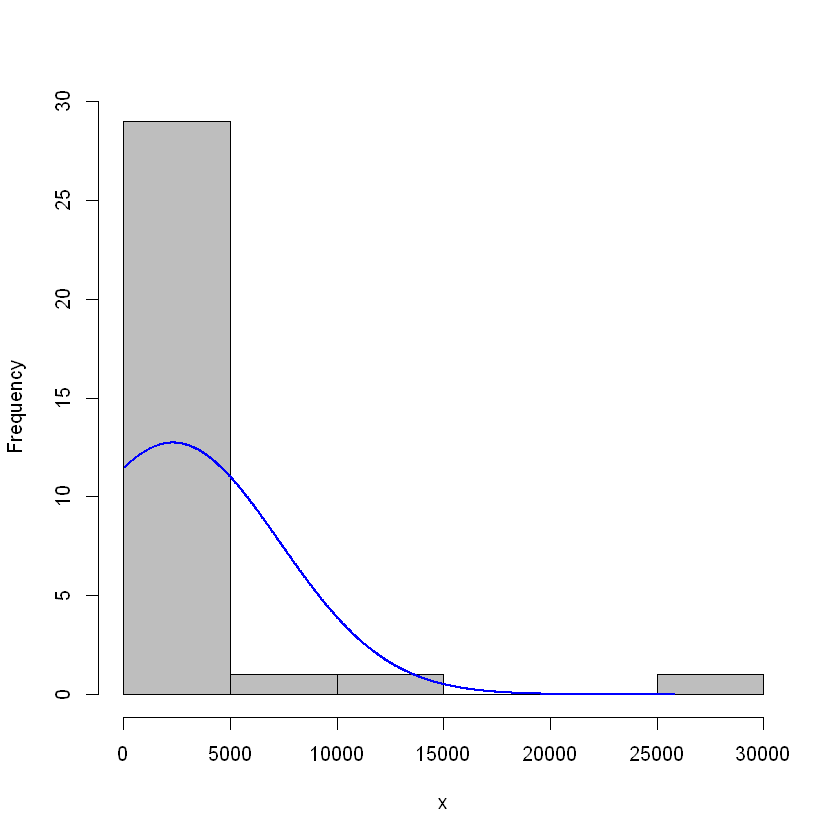

In [407]:
plotNormalHistogram(Green_cars5$Car_count)

This graph seemes positively skewed. We will try the log function to se if it shifsts to a more normal distribution

In [408]:
Green_cars5$Car_countLOG <-log(Green_cars5$Car_count)

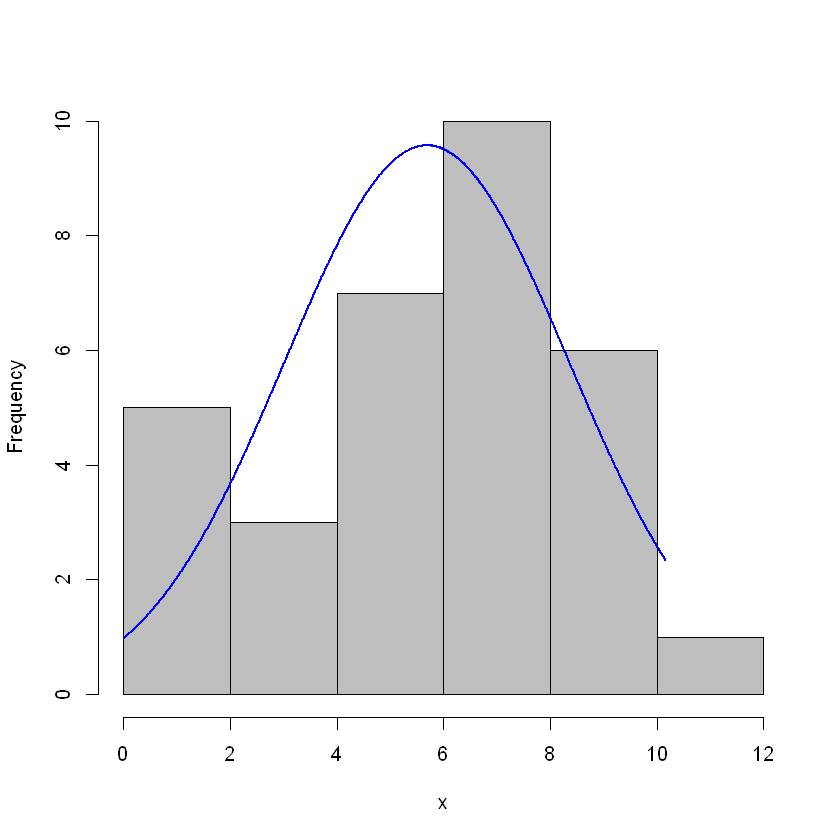

In [409]:
plotNormalHistogram(Green_cars5$Car_countLOG)

This graph is more normaly distributed

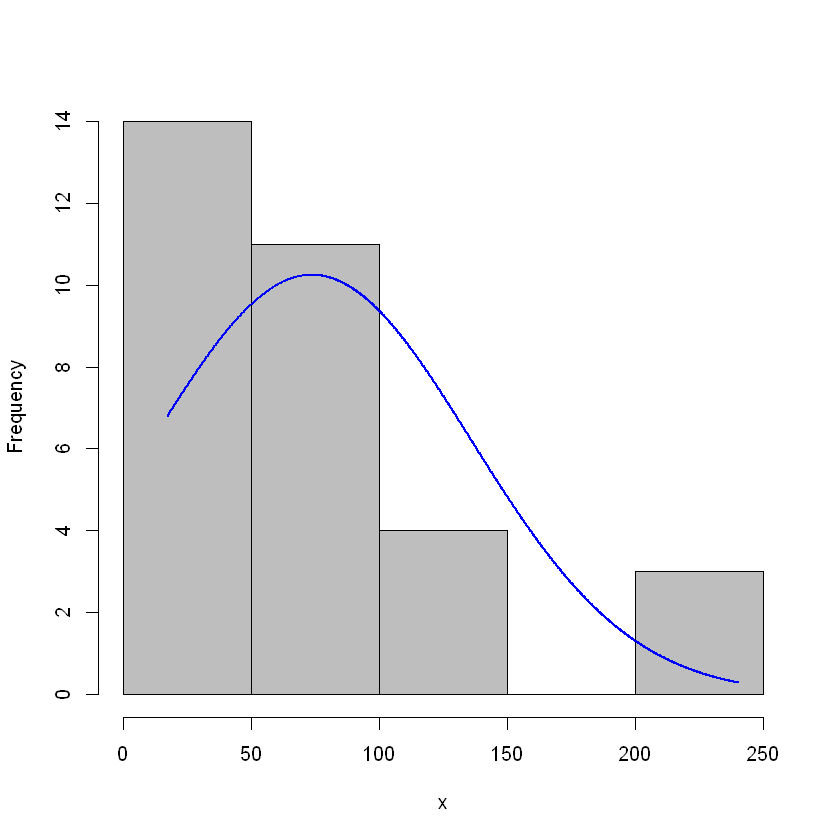

In [410]:
plotNormalHistogram(Green_cars5$Average_Electic_Range)

This graph looks positively skewed. We will try the log function to see if we can get a more normal distribution

In [411]:
Green_cars5$Average_Electic_RangeLOG=log(Green_cars5$Average_Electic_Range)

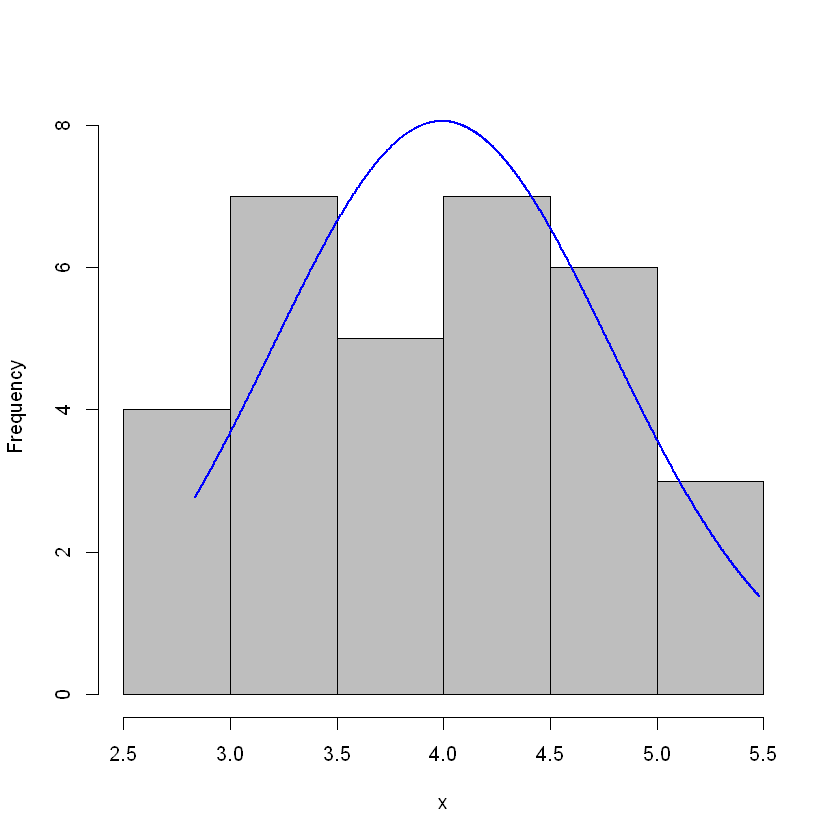

In [412]:
plotNormalHistogram(Green_cars5$Average_Electic_RangeLOG)

This graph looks mor normaly distributed

In [413]:
head(Green_cars5)
str(Green_cars5)

Make,Car_count,Average_Electic_Range,Car_countLOG,Average_Electic_RangeLOG
<chr>,<int>,<int>,<dbl>,<dbl>
AUDI,1734,83,7.4581862,4.418841
AZURE DYNAMICS,7,56,1.9459101,4.025352
BENTLEY,2,17,0.6931472,2.833213
BMW,4119,51,8.3233657,3.931826
CADILLAC,109,35,4.6913479,3.555348
CHEVROLET,8952,128,9.0996322,4.852030


tibble [32 x 5] (S3: tbl_df/tbl/data.frame)
 $ Make                    : chr [1:32] "AUDI" "AZURE DYNAMICS" "BENTLEY" "BMW" ...
 $ Car_count               : int [1:32] 1734 7 2 4119 109 8952 1675 1 826 13 ...
 $ Average_Electic_Range   : int [1:32] 83 56 17 51 35 128 32 80 85 33 ...
 $ Car_countLOG            : num [1:32] 7.458 1.946 0.693 8.323 4.691 ...
 $ Average_Electic_RangeLOG: num [1:32] 4.42 4.03 2.83 3.93 3.56 ...


In [346]:
View(Green_cars5LOG)

Car_countLOG,Average_Electic_RangeLOG
<dbl>,<dbl>
7.4581862,4.418841
1.9459101,4.025352
0.6931472,2.833213
8.3233657,3.931826
4.6913479,3.555348
9.0996322,4.852030
7.4235684,3.465736
0.0000000,4.382027
6.7165948,4.442651


In [368]:
Green_cars5LOG1=filter(Green_cars5LOG,Car_countLOG!=0)

In [369]:
Green_cars5LOG1

Car_countLOG,Average_Electic_RangeLOG
<dbl>,<dbl>
7.4581862,4.418841
1.9459101,4.025352
0.6931472,2.833213
8.3233657,3.931826
4.6913479,3.555348
9.0996322,4.852030
7.4235684,3.465736
6.7165948,4.442651
2.5649494,3.496508


In [370]:
Green_cars5LOG2=as.matrix(Green_cars5LOG1)

In [371]:
mshapiro.test(t(Green_cars5LOG2))


	Shapiro-Wilk normality test

data:  Z
W = 0.99065, p-value = 0.9931


The p value is greater than 0.05. The Multivariate normality assumption has been met

## Testing Homogeneity of Variance

In [374]:
subset5=c("Make","Car_countLOG","Average_Electic_RangeLOG")
Green_cars5LOG3=Green_cars5[subset5]

In [457]:
Green_cars5LOG3$Make=as.factor(Green_cars5LOG3$Make)

In [458]:
Green_cars5LOG4=filter(Green_cars5LOG3,Car_countLOG!=0)

In [459]:
Green_cars5LOG4

Make,Car_countLOG,Average_Electic_RangeLOG
<fct>,<dbl>,<dbl>
AUDI,7.4581862,4.418841
AZURE DYNAMICS,1.9459101,4.025352
BENTLEY,0.6931472,2.833213
BMW,8.3233657,3.931826
CADILLAC,4.6913479,3.555348
CHEVROLET,9.0996322,4.852030
CHRYSLER,7.4235684,3.465736
FIAT,6.7165948,4.442651
FISKER,2.5649494,3.496508


In [475]:
leveneTest(Green_cars5LOG4$Car_countLOG,Green_cars5LOG4$Make, data=Green_cars5LOG4)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,30,NaN,NaN
,0,NA,NA


In [451]:
Green_cars5LOG4$MakeR= NA

In [452]:
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='AUDI'] <- 0
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='AZURE DYNAMICS'] <- 1
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='BENTLEY'] <- 2
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='BMW'] <- 3
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='CADILLAC'] <- 4
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='CHEVROLET'] <- 5
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='CHRYSLER'] <- 6
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='FIAT'] <- 7
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='FISKER'] <- 8
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='FORD'] <- 9
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='HONDA'] <- 10
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='HYUNDAI'] <- 11
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='JAGUAR'] <- 12
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='JEEP'] <- 13
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='KIA'] <- 14
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='LAND ROVER'] <- 15
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='LINCOLN'] <- 16
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='MERCEDES-BENZ'] <- 17
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='MINI'] <- 18
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='MITSUBISHI'] <- 19
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='NISSAN'] <- 20
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='POLESTAR'] <- 21
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='PORSCHE'] <- 22
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='SMART'] <- 23
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='SUBARU'] <- 24
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='TESLA'] <- 25
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='TH!NK'] <- 26
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='TOYOTA'] <- 27
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='VOLKSWAGEN'] <- 28
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='VOLVO'] <- 29
Green_cars5LOG4$MakeR[Green_cars5LOG4$Make=='WHEEGO ELECTRIC CARS'] <- 31

In [453]:
Green_cars5LOG4

Make,Car_countLOG,Average_Electic_RangeLOG,MakeR
<chr>,<dbl>,<dbl>,<dbl>
AUDI,7.4581862,4.418841,0
AZURE DYNAMICS,1.9459101,4.025352,1
BENTLEY,0.6931472,2.833213,2
BMW,8.3233657,3.931826,3
CADILLAC,4.6913479,3.555348,4
CHEVROLET,9.0996322,4.852030,5
CHRYSLER,7.4235684,3.465736,6
FIAT,6.7165948,4.442651,7
FISKER,2.5649494,3.496508,8


In [454]:
Green_cars5LOG4$MakeR=as.factor(Green_cars5LOG4$MakeR)

In [455]:
Green_cars5LOG4

Make,Car_countLOG,Average_Electic_RangeLOG,MakeR
<chr>,<dbl>,<dbl>,<fct>
AUDI,7.4581862,4.418841,0
AZURE DYNAMICS,1.9459101,4.025352,1
BENTLEY,0.6931472,2.833213,2
BMW,8.3233657,3.931826,3
CADILLAC,4.6913479,3.555348,4
CHEVROLET,9.0996322,4.852030,5
CHRYSLER,7.4235684,3.465736,6
FIAT,6.7165948,4.442651,7
FISKER,2.5649494,3.496508,8


In [465]:
leveneTest(Green_cars5LOG4$Car_countLOG,Green_cars5LOG4$Make, data=Green_cars5LOG4)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,30,NaN,NaN
,0,NA,NA
